### 목표
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv('./data/bmi_500.csv', index_col='Label')
data.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [3]:
# 정보와 몇개의 행(500,500,500)이 있는지 알려줌 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### 비만도 등급별로 시각화

In [19]:
def Scatter(label, color):
    t = data.loc[label]
    plt.scatter(t['Weight'],t['Height'],c = color,label = label)

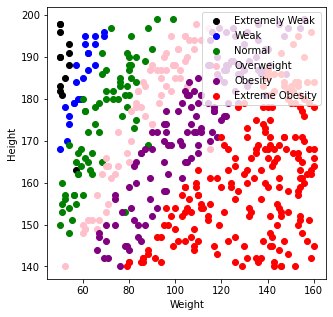

In [20]:
plt.figure(figsize=(5,5))
Scatter('Extremely Weak', 'black')
Scatter('Weak', 'blue')
Scatter('Normal', 'green')
Scatter('Overweight', 'pink')
Scatter('Obesity', 'purple')
Scatter('Extreme Obesity', 'red')
# 범례 : plt.legend()
plt.legend(loc='upper right')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [16]:
# 중복값 x unique()
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [9]:
# Normal 인 사람만 나옴 (인덱싱)
data.loc['Normal']

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [21]:
# Normal 인 사람중에 Weight 만 추출
data.loc['Normal']['Weight']

Label
Normal    87
Normal    81
Normal    51
Normal    79
Normal    67
          ..
Normal    65
Normal    64
Normal    55
Normal    80
Normal    59
Name: Weight, Length: 69, dtype: int64

In [22]:
data = pd.read_csv('./data/bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


1. 문제와 답으로 분리
2. 훈련셋과 평가셋으로 분리
3. 모델생성 및 하이퍼파라미터 조정
4. 학습 및 평가
##### 문자는 학습 불가 , Height와 Weight 만 사용
###### 문제 : Height, Weight , 답 : Label

In [29]:
X = data.iloc[:,1:3]
y = data.iloc[:, 3]
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [30]:
# 7:3 0~349 (350개)
# 훈련셋 - 공부시키기 위해서, 학습시키기 위한 데이터
X_train = X.iloc[:350,:]
y_train = y[:350]

# 350~499 (150개)
# 평가셋 - 공부가 잘됐는지 판별하는 데이터, 테스트 데이터
X_test = X.iloc[350:,:]
y_test = y[350:]

In [31]:
# 크기확인
print('훈련용 문제:', X_train.shape)
print('훈련용 답:',y_train.shape)
print('테스트용 문제:', X_test.shape)
print('테스트용 답:', y_test.shape)

훈련용 문제: (350, 2)
훈련용 답: (350,)
테스트용 문제: (150, 2)
테스트용 답: (150,)


In [32]:
# 모델 생성 및 하이퍼 파라미터 조정
# n_neighbors 이웃의 수
knn_model = KNeighborsClassifier(n_neighbors=5) # 기본값 n_neighbors=5

In [33]:
# 모델 학습
# fit()
# 데이터에 맞춰서 모델이 학습함
# 훈련용 문제, 훈련용 답 => 지도학습 == 교사학습
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
# 모델 예측
# predict()
# 테스트용 문제
pre = knn_model.predict(X_test) # 정답 x, 예측값
pre

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

In [35]:
# 모델 성능 평가
# 정확도 평가
# metrics 모델 성능 평가할 수 있는 지표 도구
metrics.accuracy_score(y_test,pre) #91%정확도 값

0.9066666666666666

In [36]:
# 모델 자체 정확도 함수
knn_model.score(X_test, y_test)

0.9066666666666666

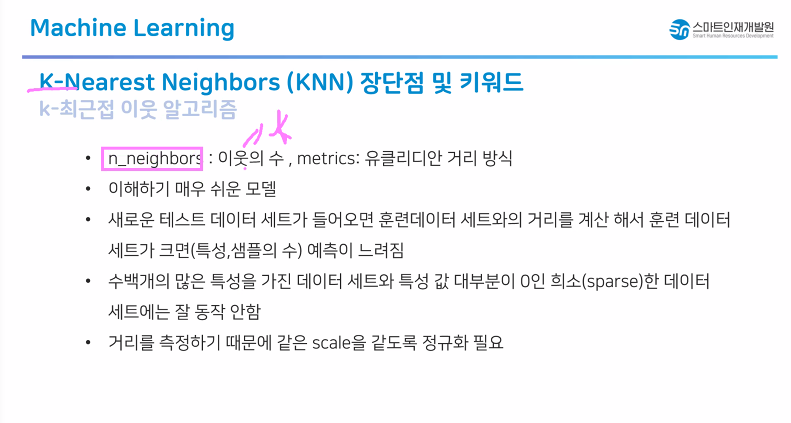